# Homework #1
## Submitted by: Anton Morozov
## Due: October 13, 23:59

### 1. Load train and test data using pandas or numpy

In [1]:
import pandas as pd  # Load all necessary libraries
import numpy as np
import scipy
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
data_train = pd.read_csv('hw1_train.csv')
data_test = pd.read_csv('hw1_test.csv')

In [3]:
data_train.head(10)

,Target,Time-0,Time-1,Time-2,Time-3,Time-4,Time-5,Time-6,Time-7,Time-8,...,Time-490,Time-491,Time-492,Time-493,Time-494,Time-495,Time-496,Time-497,Time-498,Time-499
0,-1,-0.140400,0.17164,0.302040,0.23280,0.033853,-0.22418,-0.46999,-0.645400,-0.617700,...,-0.31997,0.390900,0.97483,1.258700,1.14330,0.647090,-0.049582,-0.690400,-0.97660,-0.79426
1,-1,0.334040,0.32225,0.453840,0.67185,0.887900,1.02050,1.05980,1.030300,0.950750,...,0.43519,-0.346500,-0.92491,-1.208700,-1.24800,-1.140000,-1.041800,-1.041800,-1.15960,-1.37570
2,-1,0.716690,0.74437,0.725910,0.66133,0.555220,0.41359,0.24658,0.065273,-0.121110,...,3.17100,2.276000,1.21950,0.081881,-1.05030,-2.092900,-2.983300,-3.675300,-4.13660,-4.33960
3,1,1.240300,1.33120,1.386600,1.38320,1.306000,1.14280,0.87861,0.532290,0.140020,...,-0.82026,-1.124600,-1.30200,-1.340600,-1.27140,-1.146400,-1.011300,-0.931220,-0.93450,-1.00130
4,-1,-1.159500,-1.20420,-1.167600,-1.03350,-0.818170,-0.55812,-0.29929,-0.093691,0.022770,...,0.66085,0.441440,0.20618,-0.006941,-0.14692,-0.183080,-0.112380,0.008987,0.13141,0.18627
5,1,0.659020,0.32579,0.019658,-0.22144,-0.393310,-0.51609,-0.60286,-0.661320,-0.706270,...,0.24442,0.045383,-0.16730,-0.382870,-0.59915,-0.786110,-0.913570,-0.932320,-0.81169,-0.55159
6,-1,-0.357040,-0.34950,-0.478710,-0.67790,-0.884630,-1.00200,-0.98154,-0.741430,-0.256900,...,0.25993,0.418210,0.40421,0.305150,0.15980,0.082486,0.122110,0.219020,0.26962,0.19748
7,-1,0.012008,0.75968,1.301100,1.56440,1.511800,1.21680,0.75547,0.345710,0.032022,...,-0.73609,-0.503290,-0.33897,-0.278930,-0.23153,-0.059515,0.343610,0.954550,1.64870,2.14380
8,1,-1.064300,-1.10270,-1.095800,-1.05370,-0.961710,-0.80527,-0.55537,-0.203580,0.204560,...,-0.87814,-1.131700,-1.25970,-1.253400,-1.11580,-0.870280,-0.558200,-0.232370,0.06438,0.31117
9,1,-1.196700,-0.93059,-0.608550,-0.23722,0.177140,0.61496,1.04970,1.444200,1.761800,...,-0.11264,0.162020,0.42344,0.656310,0.85193,1.011200,1.128800,1.190100,1.17520,1.06690


In [4]:
data_test.head()

,Target,Time-0,Time-1,Time-2,Time-3,Time-4,Time-5,Time-6,Time-7,Time-8,...,Time-490,Time-491,Time-492,Time-493,Time-494,Time-495,Time-496,Time-497,Time-498,Time-499
0,-1,-0.79717,-0.664390,-0.37301,0.040815,0.52694,0.98429,1.3531,1.5781,1.6593,...,1.12080,0.722420,0.36207,0.092083,-0.081268,-0.21257,-0.39146,-0.66439,-1.073800,-1.56430
1,1,0.80485,0.634630,0.37347,0.038343,-0.34099,-0.74086,-1.1097,-1.3954,-1.5702,...,0.38640,0.049213,-0.25814,-0.510580,-0.683650,-0.77382,-0.78525,-0.71489,-0.560440,-0.31909
2,-1,0.72799,0.111280,-0.49912,-1.068600,-1.57840,-1.99050,-2.3020,-2.5034,-2.5852,...,0.39446,0.463680,0.50773,0.517170,0.504590,0.47627,0.43851,0.39446,0.339400,0.25539
3,-1,-0.23444,-0.502160,-0.73249,-0.946130,-1.13970,-1.32330,-1.4902,-1.6071,-1.6204,...,-0.95280,-0.929440,-0.92276,-0.929440,-0.909410,-0.83597,-0.69577,-0.47879,-0.188710,0.11974
4,-1,-0.17133,-0.062285,0.23583,0.710400,1.24000,1.64980,1.8763,1.8655,1.7038,...,0.77619,0.725500,0.69745,0.731970,0.808540,0.83982,0.73305,0.43752,-0.026585,-0.60221


#### More info about data_train and data_test

In [5]:
data_train.shape

(1320, 501)

In [6]:
data_test.shape

(3601, 501)

In [7]:
data_train.info()
print('\n')
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Columns: 501 entries, Target to Time-499
dtypes: float64(500), int64(1)
memory usage: 5.0 MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3601 entries, 0 to 3600
Columns: 501 entries, Target to Time-499
dtypes: float64(500), int64(1)
memory usage: 13.8 MB


In [8]:
data_train.describe()

,Target,Time-0,Time-1,Time-2,Time-3,Time-4,Time-5,Time-6,Time-7,Time-8,...,Time-490,Time-491,Time-492,Time-493,Time-494,Time-495,Time-496,Time-497,Time-498,Time-499
count,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,...,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000
mean,-0.031818,0.056002,0.049911,0.038883,0.024069,0.007442,-0.008919,-0.023496,-0.033576,-0.038521,...,-0.021316,-0.020575,-0.021015,-0.022639,-0.024066,-0.024627,-0.023276,-0.019195,-0.012906,-0.004523
std,0.999872,1.030456,1.027541,1.031559,1.037225,1.040995,1.041183,1.039772,1.037451,1.032377,...,0.997735,0.998892,1.003872,1.005504,1.001538,0.995778,0.995949,1.006262,1.021453,1.034001
min,-1.000000,-3.295300,-3.114200,-3.143400,-3.210100,-3.488700,-3.297400,-3.530600,-3.614100,-3.499100,...,-3.191000,-2.759400,-2.923200,-3.345700,-3.640700,-3.644500,-3.323400,-3.675300,-4.136600,-4.339600
25%,-1.000000,-0.615185,-0.622537,-0.647920,-0.703828,-0.710407,-0.704155,-0.701902,-0.726530,-0.725650,...,-0.659485,-0.667103,-0.675030,-0.701325,-0.666675,-0.639500,-0.675743,-0.684493,-0.703070,-0.668713
50%,-1.000000,0.060756,0.063215,0.072927,0.046644,-0.001561,-0.033439,-0.069241,-0.038386,-0.039849,...,-0.034602,-0.025947,-0.018704,-0.023849,-0.047471,-0.059076,-0.055776,-0.062619,-0.038624,-0.010347
75%,1.000000,0.725193,0.683445,0.708508,0.721960,0.711718,0.667813,0.662852,0.670717,0.656107,...,0.636785,0.645740,0.627622,0.626095,0.627945,0.618563,0.635045,0.610607,0.618785,0.642832
max,1.000000,3.972300,3.854800,3.500800,3.425200,3.603900,3.498300,3.202600,3.149200,3.149300,...,3.171000,3.038900,3.307500,3.440600,3.372700,3.878000,4.130700,4.099100,3.791200,3.696600


In [9]:
data_test.describe()

,Target,Time-0,Time-1,Time-2,Time-3,Time-4,Time-5,Time-6,Time-7,Time-8,...,Time-490,Time-491,Time-492,Time-493,Time-494,Time-495,Time-496,Time-497,Time-498,Time-499
count,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,...,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000
mean,-0.025271,-0.016708,-0.015270,-0.013605,-0.011943,-0.009966,-0.007062,-0.003495,0.000568,0.005354,...,0.008724,0.006896,0.004053,0.000929,-0.001922,-0.003369,-0.003237,-0.001820,0.000031,0.001394
std,0.999819,1.058456,1.051904,1.044560,1.042573,1.046933,1.052830,1.055439,1.054305,1.050425,...,1.037718,1.040631,1.040826,1.036657,1.028358,1.018718,1.011871,1.012366,1.020914,1.032490
min,-1.000000,-3.933500,-3.656900,-3.479500,-3.595400,-3.773900,-3.914700,-3.855300,-4.497400,-4.552600,...,-4.402100,-4.073000,-4.014400,-3.817000,-3.574300,-3.746400,-3.680800,-3.904600,-4.221600,-4.076000
25%,-1.000000,-0.685690,-0.699530,-0.688300,-0.709730,-0.694990,-0.691040,-0.690320,-0.701240,-0.675090,...,-0.664480,-0.690140,-0.688230,-0.677700,-0.674280,-0.655950,-0.657260,-0.664390,-0.659580,-0.675840
50%,-1.000000,-0.007573,-0.003044,-0.003066,0.008598,0.001042,0.000280,-0.011988,-0.026672,-0.002031,...,-0.001031,0.012348,0.003914,0.005957,-0.002728,-0.010841,-0.008002,-0.004802,-0.013723,-0.003186
75%,1.000000,0.660360,0.674900,0.683700,0.679470,0.697530,0.688800,0.721440,0.705020,0.692260,...,0.696860,0.714820,0.707360,0.692840,0.666430,0.668460,0.671540,0.677350,0.684050,0.682920
max,1.000000,3.503900,3.369300,3.498300,3.493800,3.293300,3.605600,3.895900,3.741000,3.630900,...,3.971900,3.522200,3.842700,3.916700,3.670100,3.567900,3.471800,3.798100,3.863300,4.349700


#### Creating data sets without "Target", with "Target" = 1, and with "Target" = -1

In [10]:
df = data_train.drop(['Target'], axis = 1)
df_pos = data_train[data_train['Target'] == 1].drop(['Target'], axis = 1)
df_neg = data_train[data_train['Target'] == -1].drop(['Target'], axis = 1)

In [11]:
df.head()

,Time-0,Time-1,Time-2,Time-3,Time-4,Time-5,Time-6,Time-7,Time-8,Time-9,...,Time-490,Time-491,Time-492,Time-493,Time-494,Time-495,Time-496,Time-497,Time-498,Time-499
0,-0.14040,0.17164,0.30204,0.23280,0.033853,-0.22418,-0.46999,-0.645400,-0.61770,-0.367280,...,-0.31997,0.39090,0.97483,1.258700,1.14330,0.64709,-0.049582,-0.690400,-0.97660,-0.79426
1,0.33404,0.32225,0.45384,0.67185,0.887900,1.02050,1.05980,1.030300,0.95075,0.858440,...,0.43519,-0.34650,-0.92491,-1.208700,-1.24800,-1.14000,-1.041800,-1.041800,-1.15960,-1.37570
2,0.71669,0.74437,0.72591,0.66133,0.555220,0.41359,0.24658,0.065273,-0.12111,-0.301030,...,3.17100,2.27600,1.21950,0.081881,-1.05030,-2.09290,-2.983300,-3.675300,-4.13660,-4.33960
3,1.24030,1.33120,1.38660,1.38320,1.306000,1.14280,0.87861,0.532290,0.14002,-0.258260,...,-0.82026,-1.12460,-1.30200,-1.340600,-1.27140,-1.14640,-1.011300,-0.931220,-0.93450,-1.00130
4,-1.15950,-1.20420,-1.16760,-1.03350,-0.818170,-0.55812,-0.29929,-0.093691,0.02277,0.044337,...,0.66085,0.44144,0.20618,-0.006941,-0.14692,-0.18308,-0.112380,0.008987,0.13141,0.18627


In [12]:
df_pos.head()

,Time-0,Time-1,Time-2,Time-3,Time-4,Time-5,Time-6,Time-7,Time-8,Time-9,...,Time-490,Time-491,Time-492,Time-493,Time-494,Time-495,Time-496,Time-497,Time-498,Time-499
3,1.240300,1.33120,1.386600,1.38320,1.30600,1.14280,0.87861,0.53229,0.14002,-0.258260,...,-0.82026,-1.124600,-1.30200,-1.34060,-1.27140,-1.14640,-1.01130,-0.93122,-0.93450,-1.00130
5,0.659020,0.32579,0.019658,-0.22144,-0.39331,-0.51609,-0.60286,-0.66132,-0.70627,-0.731020,...,0.24442,0.045383,-0.16730,-0.38287,-0.59915,-0.78611,-0.91357,-0.93232,-0.81169,-0.55159
8,-1.064300,-1.10270,-1.095800,-1.05370,-0.96171,-0.80527,-0.55537,-0.20358,0.20456,0.607480,...,-0.87814,-1.131700,-1.25970,-1.25340,-1.11580,-0.87028,-0.55820,-0.23237,0.06438,0.31117
9,-1.196700,-0.93059,-0.608550,-0.23722,0.17714,0.61496,1.04970,1.44420,1.76180,1.968200,...,-0.11264,0.162020,0.42344,0.65631,0.85193,1.01120,1.12880,1.19010,1.17520,1.06690
11,-0.033265,0.25006,0.514420,0.71697,0.82385,0.81315,0.69795,0.50782,0.27872,0.057107,...,2.10570,1.604100,1.02850,0.41160,-0.21645,-0.82711,-1.39570,-1.89080,-2.27250,-2.51630


In [13]:
df_neg.head()

,Time-0,Time-1,Time-2,Time-3,Time-4,Time-5,Time-6,Time-7,Time-8,Time-9,...,Time-490,Time-491,Time-492,Time-493,Time-494,Time-495,Time-496,Time-497,Time-498,Time-499
0,-0.14040,0.17164,0.30204,0.23280,0.033853,-0.22418,-0.46999,-0.645400,-0.61770,-0.367280,...,-0.31997,0.39090,0.97483,1.258700,1.14330,0.647090,-0.049582,-0.690400,-0.97660,-0.79426
1,0.33404,0.32225,0.45384,0.67185,0.887900,1.02050,1.05980,1.030300,0.95075,0.858440,...,0.43519,-0.34650,-0.92491,-1.208700,-1.24800,-1.140000,-1.041800,-1.041800,-1.15960,-1.37570
2,0.71669,0.74437,0.72591,0.66133,0.555220,0.41359,0.24658,0.065273,-0.12111,-0.301030,...,3.17100,2.27600,1.21950,0.081881,-1.05030,-2.092900,-2.983300,-3.675300,-4.13660,-4.33960
4,-1.15950,-1.20420,-1.16760,-1.03350,-0.818170,-0.55812,-0.29929,-0.093691,0.02277,0.044337,...,0.66085,0.44144,0.20618,-0.006941,-0.14692,-0.183080,-0.112380,0.008987,0.13141,0.18627
6,-0.35704,-0.34950,-0.47871,-0.67790,-0.884630,-1.00200,-0.98154,-0.741430,-0.25690,0.323460,...,0.25993,0.41821,0.40421,0.305150,0.15980,0.082486,0.122110,0.219020,0.26962,0.19748


### 2. Plot & analyze several training examples of each class using plt.plot (from matplotlib import pyplot as plt)

In [14]:
target = list(set(data_train.loc[:,'Target']))
t_dict = dict()
for t in target:
    t_dict[t] = data_train[data_train['Target'] == t].index

In [15]:
def t_random(t):
    return np.random.choice(t_dict[t])

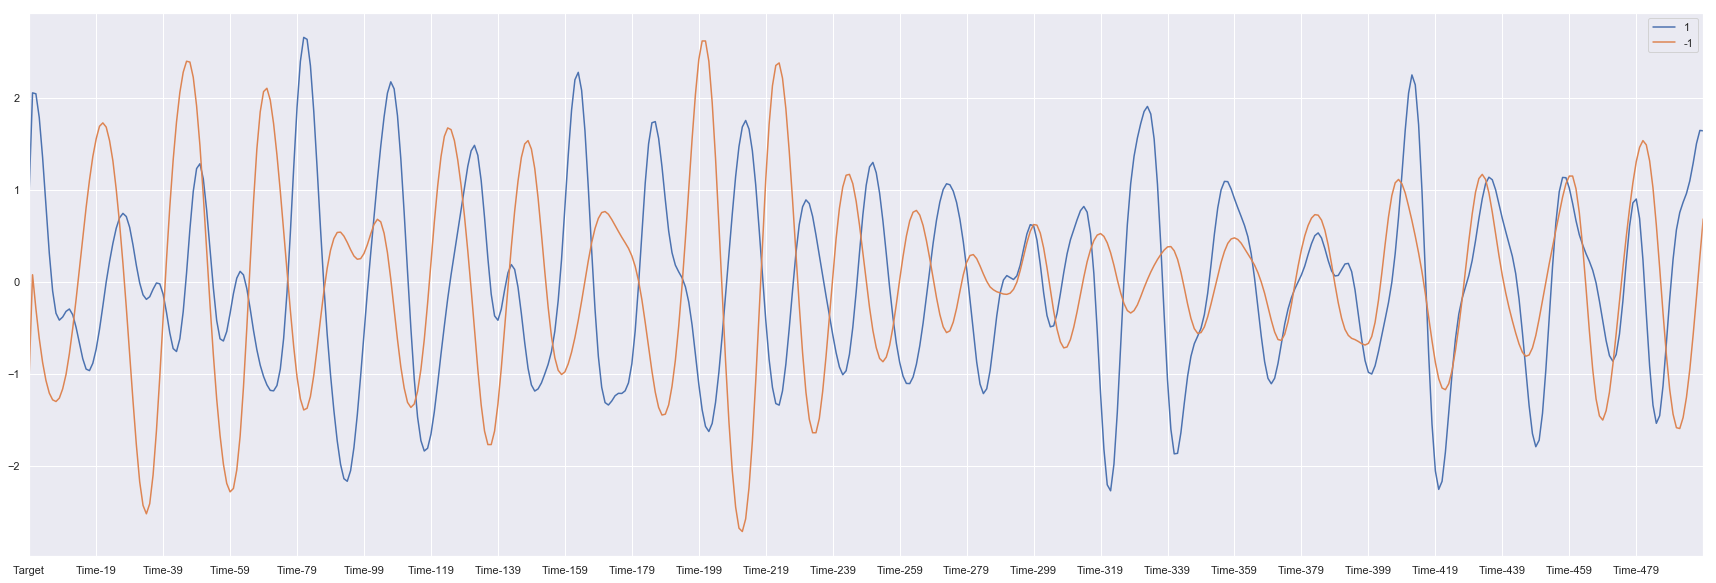

In [16]:
plt.figure(figsize=(30,10))

plt.xlim(0,500)
plt.xticks(range(0,500,20))

lent = len(target)

for i in range(2):
    t = target[i%lent]
    plt.plot(data_train.loc[t_random(t)], label = str(t))
        
plt.legend();

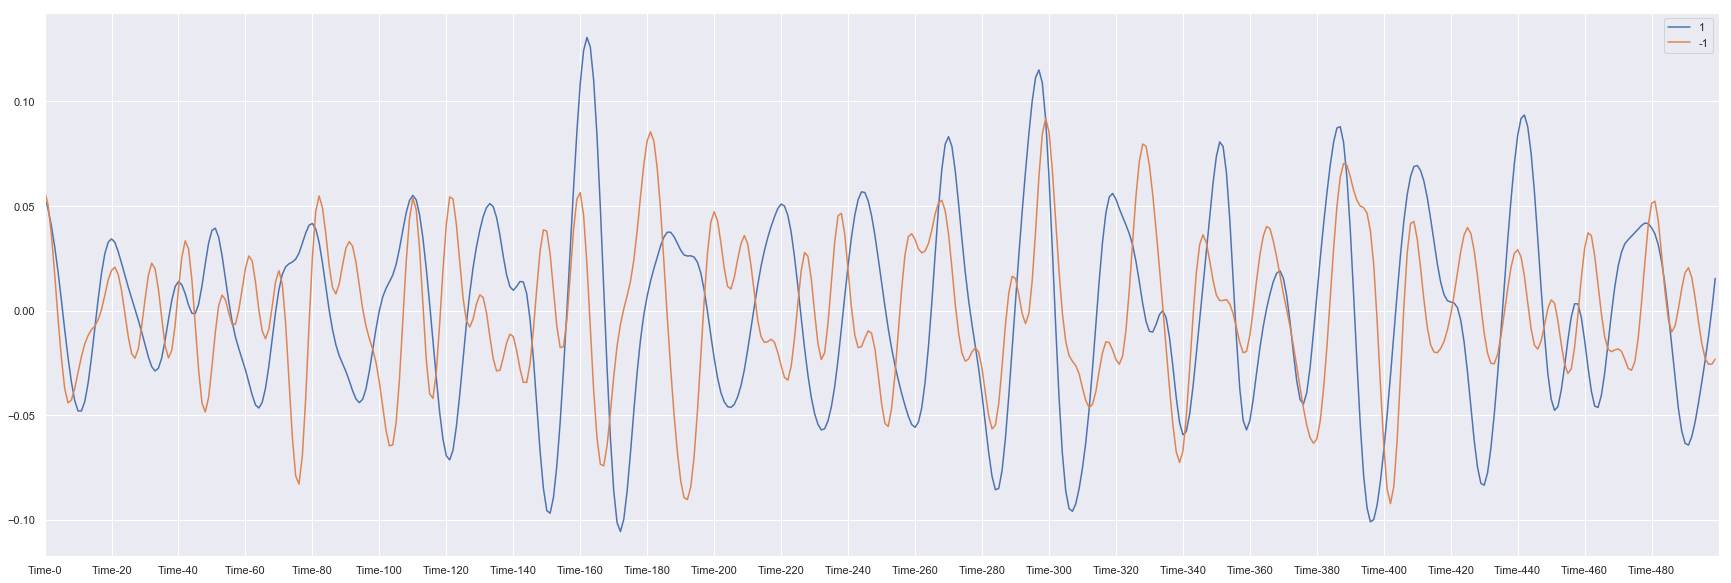

In [17]:
mean_target = data_train.groupby(by = 'Target').mean()

plt.figure(figsize = (30,10))
plt.xlim(0,500)
plt.xticks(range(0,500,20))

for t in target:
    plt.plot(mean_target.loc[t], label = str(t))

plt.legend();

In [18]:
mean_target

,Time-0,Time-1,Time-2,Time-3,Time-4,Time-5,Time-6,Time-7,Time-8,Time-9,...,Time-490,Time-491,Time-492,Time-493,Time-494,Time-495,Time-496,Time-497,Time-498,Time-499
Target,,,,,,,,,,,,,,,,,,,,,
-1,0.057578,0.050947,0.037003,0.017715,-0.003280,-0.022263,-0.037115,-0.044112,-0.042787,-0.037302,...,0.018193,0.020474,0.015818,0.006062,-0.005288,-0.015752,-0.022897,-0.025660,-0.025613,-0.023231
1,0.054322,0.048807,0.040886,0.030842,0.018868,0.005302,-0.008981,-0.022347,-0.033974,-0.043031,...,-0.063421,-0.064323,-0.060269,-0.053226,-0.044079,-0.034087,-0.023680,-0.012305,0.000637,0.015415


### 3. Propose several features potentially useful for classification (for example, the maximal absolute value of a time series)

#### Statistical Feautres: Mean, Median, Max, Min

In [19]:
mean = []
median= []
absmax = []
absmin = []
for i in range(len(df)):
    mean.append(df.iloc[i, 1:].mean())
    median.append(df.iloc[i, 1:].median())
    absmax.append(max(abs(df.iloc[i, 1:])))
    absmin.append(min(abs(df.iloc[i, 1:])))

In [22]:
ft = pd.DataFrame()
ft['Target'] = data_train.Target
ft['Mean'] = mean
ft['Median'] = median
ft['Max'] = absmax
ft['Min'] = absmin


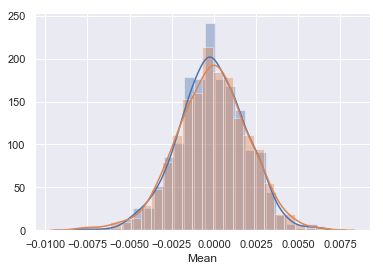

In [23]:
sns.distplot(ft[(ft['Target']==1)].Mean);
sns.distplot(ft[(ft['Target']==-1)].Mean);

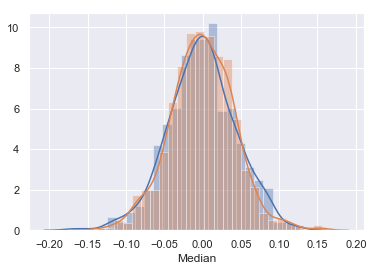

In [24]:
sns.distplot(ft[(ft['Target']==1)].Median);
sns.distplot(ft[(ft['Target']==-1)].Median);

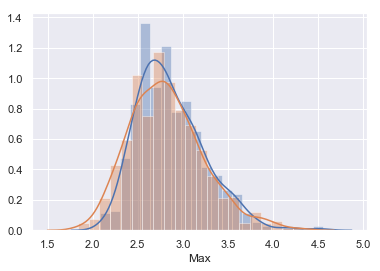

In [25]:
sns.distplot(ft[(ft['Target']==1)].Max);
sns.distplot(ft[(ft['Target']==-1)].Max);

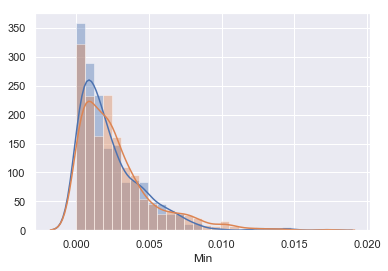

In [26]:
sns.distplot(ft[(ft['Target']==1)].Min);
sns.distplot(ft[(ft['Target']==-1)].Min);

In [29]:
extr = list()
for row_index in data_train.index:
    extr_count = np.diff(np.sign(np.diff(data_train.loc[row_index, 'Time-0':'Time-499']))).nonzero()[0]
    ext = extr_count.size
    extr.append(ext)
data_train['Extrema'] = extr

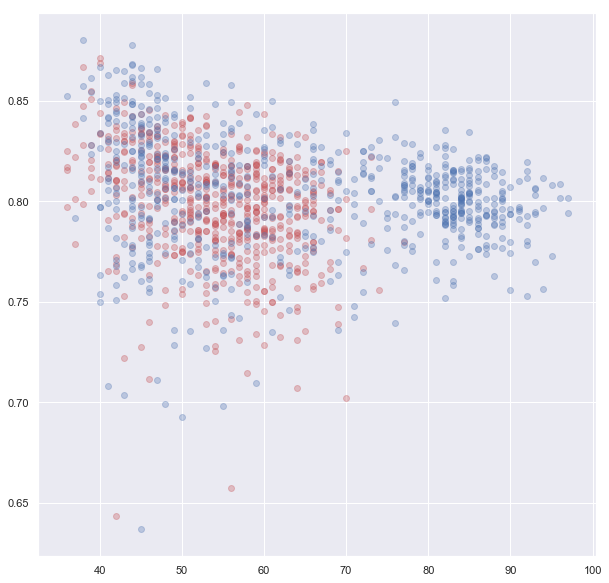

In [30]:
plt.figure(figsize=(10, 10))

pos_index = data_train[data_train['Target'] == 1].index
neg_index = data_train[data_train['Target'] == -1].index

for i in pos_index:
    plt.scatter(data_train.loc[i, 'Extrema'], np.mean(np.abs(data_train.loc[i,'Time-0':'Time-499'])), color='r', alpha=0.3)
for i in neg_index:
    plt.scatter(data_train.loc[i, 'Extrema'], np.mean(np.abs(data_train.loc[i,'Time-0':'Time-499'])), color='b', alpha=0.3)

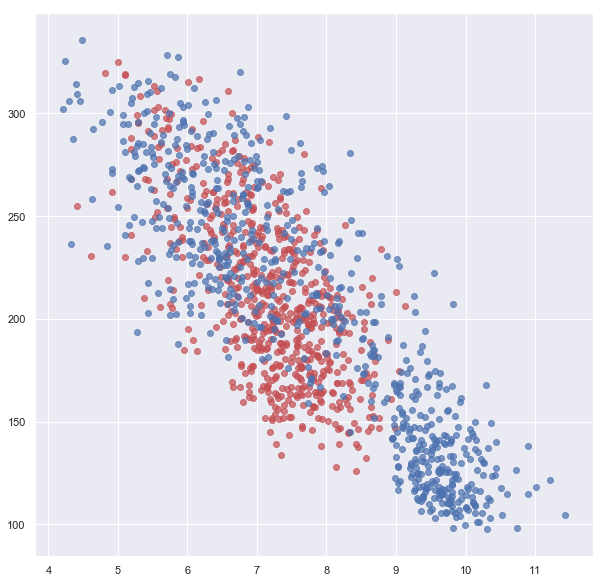

In [31]:
def spect(data, t):
    mean_spectrum = []
    max_spectrum = []
    for i in data_train[data['Target'] == t].index:
        series = data_train.loc[i,'Time-0':'Time-499']
        spectrum = np.fft.fft(series, n=100000)
        y = np.max(abs(spectrum))
        x = np.mean(abs(spectrum))
        mean_spectrum.append(x)
        max_spectrum.append(y)
        plt.scatter(x, y, c= 'r' if t == 1 else 'b', alpha=0.7, label=str(t))
    return mean_spectrum, max_spectrum

plt.figure(figsize=(10,10))
pos_mean_spectrum, pos_max_spectrum = spect(data_train, 1)
neg_mean_spectrum, neg_max_spectrum = spect(data_train, -1)

In [35]:
def pos_or_neg(right):
    graph = []
    for t in data_train[data_train['Target'] == right].index:
        count = 0
        grad = np.gradient(np.gradient(data_train.loc[t, 'Time-0':'Time-150']))
        for gradix in range(1, len(grad)):
            if np.sign(grad[gradix]) != np.sign(grad[gradix-1]):
                count += 1
        graph.append(count)
    return graph

pos_graph = pos_or_neg(target[0])
neg_graph = pos_or_neg(target[1])

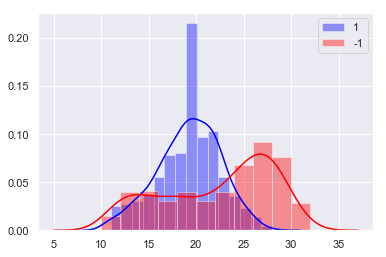

In [36]:
sns.distplot(pos_graph, color = 'blue', label='1')
sns.distplot(neg_graph, color = 'red', label='-1')
plt.legend();

In [37]:
mean_spectrum = []
max_spectrum = []
for i in data_test.index:
    series = data_test.loc[i,'Time-0':]
    spectrum = np.fft.fft(series, n = 100000)
    y = np.max(abs(spectrum))
    x = np.mean(abs(spectrum))
    mean_spectrum.append(x)
    max_spectrum.append(y)
result = list()
for j, i in enumerate(data_test.index):
    num_ext=0
    series= data_test.loc[i,'Time-150':'Time-300']
    double_grad=np.gradient(np.gradient(series))
    for grad_index in range(1,len(double_grad)):
        if np.sign(double_grad[grad_index])!=np.sign(double_grad[grad_index-1]):
            num_ext+=1
    if num_ext > 23 or num_ext < 14 or mean_spectrum[i] > 9 and max_spectrum[i] < 150:
        result.append(-1)
    else:
        result.append(1)

In [38]:
accuracy_score(data_test.Target, result)

0.7425715079144682